In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv('C:/Users/DELL/Documents/machine_learning/svm/fitness_dataset.csv')

In [46]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [47]:
df.tail()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
1995,52,173,98,60.7,106.1,NaN,1.54,3.25,1,M,1
1996,61,186,74,51.4,123.8,9.4,8.63,3.15,no,M,1
1997,77,198,89,76.7,103.6,8.3,1.98,3.36,yes,M,0
1998,62,190,63,80.7,115.9,6.7,9.21,2.39,1,F,0
1999,51,166,78,89.3,101.8,8.3,4.42,1.02,1,M,0


In [48]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')

In [49]:
df.shape

(2000, 11)

In [50]:
df.dtypes

age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                object
gender                object
is_fit                 int64
dtype: object

In [51]:
df.isna().sum()

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64

In [52]:
df['sleep_hours'].unique()

array([ nan,  7.5,  7. ,  8. ,  7.7,  7.4,  6.6,  9.1,  8.1,  5.9,  8.5,
        8.8,  4.4,  6.2,  6.3,  7.3,  7.8,  5.8,  9.9,  8.6,  7.6,  4.6,
        7.1, 10. ,  9.5,  8.2,  8.7,  8.9,  6.8,  9. ,  5.7,  9.2, 10.1,
        7.9,  5.1,  9.3,  6.7,  6.1,  5.6, 11. , 11.1,  7.2,  6.5,  4.7,
        4.1,  6.9,  4.9, 10.5, 10.9,  8.3,  6. ,  9.4, 11.5,  5.4,  4. ,
        5. ,  4.8, 10.3,  8.4,  9.8,  9.7,  4.5,  6.4, 10.7,  4.3,  5.5,
        5.2, 10.8,  5.3, 10.2, 10.4, 11.4,  9.6, 11.3,  4.2, 11.6, 10.6,
       11.7, 12. , 11.2])

In [53]:
df['sleep_hours']=df['sleep_hours'].fillna(df['sleep_hours'].mean())

In [54]:
df['gender'].value_counts()

gender
F    1030
M     970
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

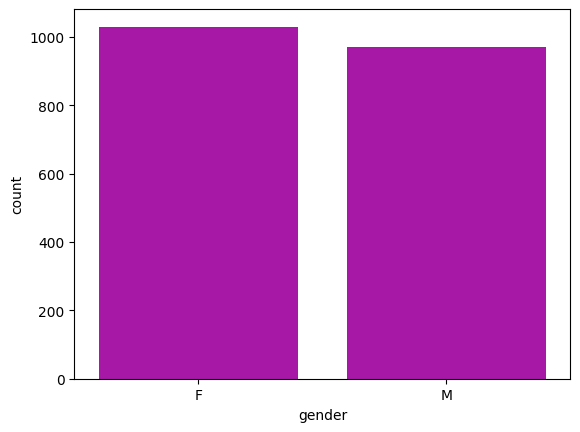

In [55]:
sns.countplot(x=df['gender'],data=df,color='m')

In [56]:
df['smokes'].value_counts()

smokes
yes    711
0      581
no     518
1      190
Name: count, dtype: int64

<Axes: xlabel='smokes', ylabel='count'>

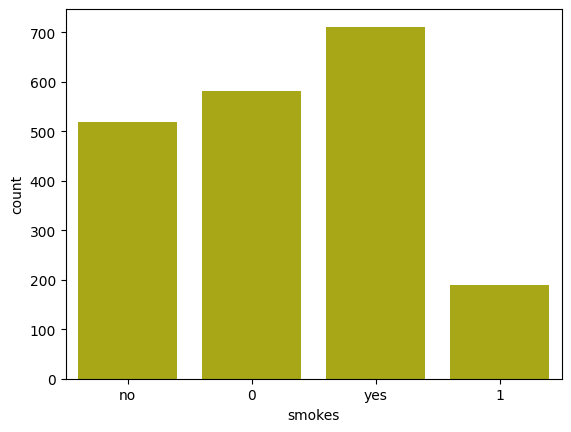

In [57]:
sns.countplot(x=df['smokes'],data=df,color='y')

In [58]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['smokes']=lab.fit_transform(df['smokes'])
df['gender']=lab.fit_transform(df['gender'])
df.dtypes

age                    int64
height_cm              int64
weight_kg              int64
heart_rate           float64
blood_pressure       float64
sleep_hours          float64
nutrition_quality    float64
activity_index       float64
smokes                 int64
gender                 int64
is_fit                 int64
dtype: object

In [59]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender
1194,52,157,74,60.4,123.2,4.6,5.42,2.39,1,0
45,79,169,73,64.6,102.0,8.6,1.51,2.82,0,0
1477,27,199,75,73.2,112.8,7.4,3.80,3.90,0,0
1293,41,195,82,62.7,130.7,8.8,6.96,3.65,3,0
1736,50,183,97,81.3,104.6,9.0,3.37,4.98,3,0
...,...,...,...,...,...,...,...,...,...,...
1791,42,184,57,76.7,116.0,9.4,2.25,2.12,0,0
1096,55,164,91,78.8,103.1,6.9,3.70,3.28,3,0
1932,29,169,119,52.4,113.5,9.6,8.33,1.78,0,1
235,56,171,117,65.9,110.4,4.8,9.38,4.57,0,0


In [61]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[0.55737705, 0.14285714, 0.2       , ..., 0.34837093, 0.33333333,
        0.        ],
       [1.        , 0.3877551 , 0.19545455, ..., 0.45614035, 0.        ,
        0.        ],
       [0.14754098, 1.        , 0.20454545, ..., 0.72681704, 0.        ,
        0.        ],
       ...,
       [0.18032787, 0.3877551 , 0.40454545, ..., 0.19548872, 0.        ,
        1.        ],
       [0.62295082, 0.42857143, 0.39545455, ..., 0.89473684, 0.        ,
        0.        ],
       [0.18032787, 0.14285714, 0.10454545, ..., 0.62907268, 0.        ,
        1.        ]], shape=(1400, 10))

In [62]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [63]:
y_test

674     1
1699    0
1282    1
1315    1
1210    0
       ..
1382    0
1371    0
854     1
995     1
1497    0
Name: is_fit, Length: 600, dtype: int64

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[313,  47],
       [ 90, 150]])

In [65]:
score=accuracy_score(y_test,y_pred)
score

0.7716666666666666